In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e17/sample_submission.csv')

In [5]:
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [12]:
data = data.drop(['Product ID', 'id'], axis = 1)
test = test.drop(['Product ID', 'id'], axis = 1)

# LabelEncoder

In [8]:
def labelencode(df):
    le=LabelEncoder()
    df['Type'] = le.fit_transform(df['Type'])

In [9]:
labelencode(data)
labelencode(test)

# Correlation

Text(0.5, 1.0, 'Correlation Table')

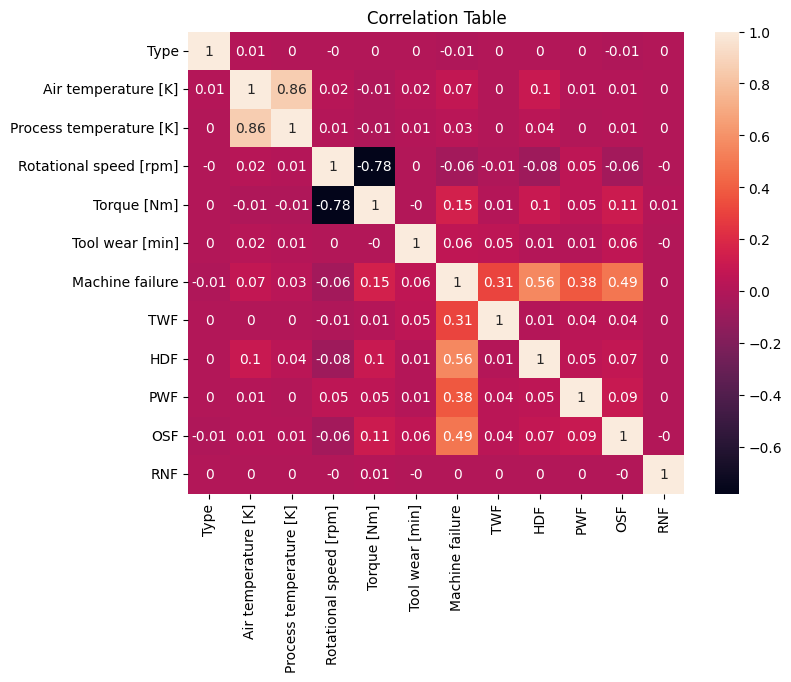

In [17]:
plt.figure(figsize = (8, 6))
sns.heatmap(round(data.corr(), 2), annot = True)
plt.title("Correlation Table")

In [18]:
x = data.drop("Machine failure",axis=1)
y = data["Machine failure"]

# Standardising

In [36]:
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
test_scaled = scaler.transform(test)

# Train Test Splits

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, random_state = 42, train_size = 0.85)

# Random Forest Classifier

In [32]:
rf = RandomForestClassifier(random_state=8, n_jobs=-1)

params = {
    'max_depth': [2,4],
    'min_samples_leaf': [5],
    'n_estimators': [400]}

grid_search_CV = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=2, scoring="accuracy")

grid_search_CV.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=8),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [5],
                         'n_estimators': [400]},
             scoring='accuracy', verbose=2)

In [33]:
grid_search_CV.best_score_

0.9961626015914101

# Submission

In [37]:
predictions = grid_search_CV.best_estimator_.predict(test_scaled)

In [39]:
sample_submission["Machine failure"] = predictions

In [40]:
sample_submission.to_csv("submission",index=False)

[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=400; total time=  18.5s
[CV] END ..max_depth=4, min_samples_leaf=5, n_estimators=400; total time=  16.2s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=400; total time=  18.6s
[CV] END ..max_depth=4, min_samples_leaf=5, n_estimators=400; total time=  16.1s
